<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite difference method - second derivative - high-order operators</div>
        </div>
    </div>
</div>

#### This exercise covers the following aspects:
* Initializing a Gaussian test function
* Calculation of numerical second derivative with 3-point operator
* Accuracy improvement of numerical derivative with 5-point operator

In [101]:
# Import Libraries
using Pkg;
using Plots;
using Statistics;
using Printf;

We initialise a Gaussian function

\begin{equation} 
f(x)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(x-x_0)^2}{2a}}
\end{equation} 

Note that this specific definition is a $\delta-$generating function. This means that $\int{f(x) dx}=1$ and in the limit $a\rightarrow0$ the function f(x) converges to a $\delta-$function.  

In [51]:
# Initialization 
xmax  =  10.0           # physical domain (m)
nx    =  100            # number of space samples
a     =  .25            # exponent of Gaussian function    
dx    =  xmax/(nx-1)    # Grid spacing dx (m)
x0    =  xmax/2         # Center of Gaussian function x0 (m)

x = collect(0:dx:xmax)   # defining space variable

# Initialization of Gaussian function 
f = (1/sqrt(2*pi*a)) * exp.(-(((x.-x0).^2)./(2*a)));

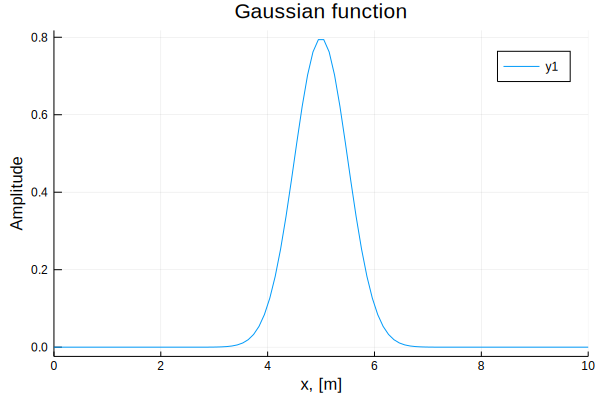

In [89]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting of gaussian
plot(x, f)
title!("Gaussian function")
xlabel!("x, [m]")
ylabel!("Amplitude")
xlims!((0, xmax))

Now let us calculate the second derivative using the finite-difference operator with three points

\begin{equation} 
f^{\prime\prime}_{num}(x)=\dfrac{f(x+dx)-2 f(x)+f(x-dx)}{dx^2}
\end{equation} 

and compare it with the analytical solution
\begin{equation} 
f^{\prime\prime}(x)= \dfrac{1}{\sqrt{2\pi a}} \left( \dfrac{(x-x_0)^2}{a^2}- \dfrac{1}{a} \right) \ e^{-\dfrac{(x-x_0)^2}{2a}}= \left( \dfrac{(x-x_0)^2}{a^2}- \dfrac{1}{a} \right) \ f(x)
\end{equation} 

In [72]:
# Second derivative with three-point operator

# Initiation of numerical and analytical derivatives 
nder3 = zeros(nx)          # numerical derivative
ader  = zeros(nx)          # analytical derivative

# Numerical second derivative of the given function 
for i in 2:nx-1
    nder3[i] = (f[i+1] - 2*f[i] + f[i-1])/(dx^2)
end

# Analytical second derivative of the Gaussian function
ader = (1/a^2)*((x.-x0).^2 .- a).*f

# Exclude boundaries
ader[1]  = 0.
ader[nx] = 0.

# Calculate rms error of numerical derivative
rms = sqrt(mean((nder3-ader).^2))


here

0.008186132716992638

┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751
┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751
┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751


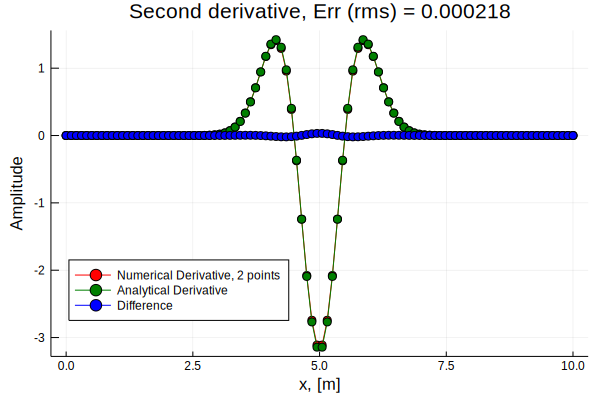

In [102]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting 
plot(x, nder3,label="Numerical Derivative, 2 points", legend=:bottomleft, marker='o', color="red")
plot!(x, ader, label="Analytical Derivative", marker='o', color="green")
plot!(x, nder3-ader, label="Difference", marker='o', color="blue")
title!(@sprintf "Second derivative, Err (rms) = %.6f " rms)
xlabel!("x, [m]")
ylabel!("Amplitude")


In the cell below calculation of the first derivative with four points is provided with the following weights:

\begin{equation}
f^{\prime\prime}(x)=\dfrac{-\dfrac{1}{12}f(x-2dx)+\dfrac{4}{3}f(x-dx)-\dfrac{5}{2}f(x) +\dfrac{4}{3}f(x+dx)-\dfrac{1}{12}f(x+2dx)}{dx^2}
\end{equation}

In [77]:
# First derivative with four points

# Initialisation of derivative
nder5 = zeros(nx) 

# Calculation of 2nd derivative  
for i in 3:nx-2
    nder5[i] = (-1/12*f[i-2] + 4/3*f[i-1] - 5/2*f[i]  + 4/3*f[i + 1] - 1/12*f[i+2]) / dx^2
end
# Exclude boundaries
ader[1]    = 0.
ader[nx-1] = 0.
    
# Calculate rms error of numerical derivative
rms = sqrt(mean((nder5-ader).^2))

0.00021777408800407503

┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751
┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751


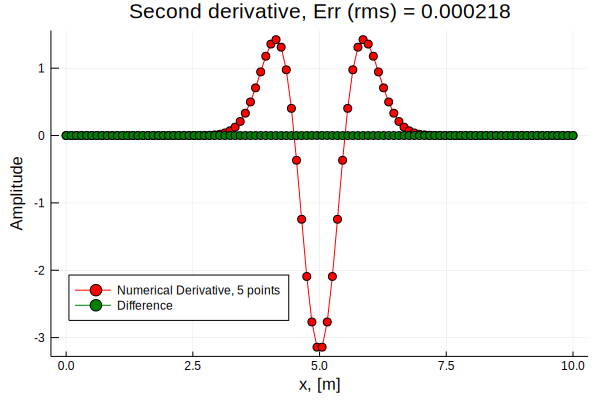

In [100]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting 
plot(x, nder5,label="Numerical Derivative, 5 points", legend=:bottomleft, marker='o', color="red")
plot!(x, nder5-ader, label="Difference", marker='o', color="green")
title!(@sprintf "Second derivative, Err (rms) = %.6f " rms)
xlabel!("x, [m]")
ylabel!("Amplitude")
#legend(loc='lower left')


### Conclusions

* 3-point finite-difference approximations can provide  estimates of the 2nd derivative of a function
* We can increase the accuracy of the approximation by using further functional values further
* A 5-point operator leads to substantially more accurate results